https://developer.spotify.com/dashboard/

Spotify dashboard link
login with your credentials
#### copy your Client id and client secret key

-------------------------------------------------------------------------------
https://developer.spotify.com/dashboard/    -----> login here to get clientid and secret key for api


https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6

https://levelup.gitconnected.com/extracting-and-analysing-spotify-tracks-with-python-d1466fc1dfee

https://developer.spotify.com/documentation/web-api/reference/#category-playlists



In [7]:
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials


auth_mngr = SpotifyClientCredentials(client_id='id', client_secret='secret')
sp = spotipy.Spotify(auth_manager= auth_mngr)

In [8]:
import matplotlib.pyplot as plt

In [9]:
# https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW
#https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8
#sp.user_playlist_tracks("Spotify", "37i9dQZF1DWTE7dVUebpUW")


## Getting the 2018 Playlist 

In [10]:
## Geting 2018 Playlist

def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Spotify', '37i9dQZF1DXe2bobNYDtW8') # top 2018 songs

In [11]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  #artist_genre=features[0]['artist_genre']
  #genere = features[0]['']

  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

In [12]:
import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df2 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])


In [13]:
df2

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,God's Plan,Scorpion,Drake,2018-06-29,198973,82,0.03320,0.754,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4
1,rockstar (feat. 21 Savage),beerbongs & bentleys,Post Malone,2018-04-27,218146,83,0.12400,0.585,0.520,0.000070,0.1310,-6.136,0.0712,159.801,4
2,Perfect,÷ (Deluxe),Ed Sheeran,2017-03-03,263400,87,0.16300,0.599,0.448,0.000000,0.1060,-6.312,0.0232,95.050,3
3,I Like Me Better,I met you when I was 18. (the playlist),Lauv,2018-05-31,197436,82,0.53500,0.752,0.505,0.000003,0.1040,-7.621,0.2530,91.970,4
4,Havana (feat. Young Thug),Camila,Camila Cabello,2018-01-12,217306,81,0.18400,0.765,0.523,0.000036,0.1320,-4.333,0.0300,104.988,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Nice For What,Scorpion,Drake,2018-06-29,210746,77,0.08910,0.585,0.909,0.000097,0.1190,-6.474,0.0707,93.372,4
96,Everyday,Bobby Tarantino II,Logic,2018-03-09,204746,71,0.04250,0.667,0.741,0.000000,0.0761,-4.099,0.0378,149.908,4
97,Jumanji,Jumanji,B Young,2018-01-05,173153,61,0.27900,0.791,0.473,0.000000,0.0959,-9.860,0.2500,95.948,4
98,Mo Bamba,MUDBOY,Sheck Wes,2018-10-05,183906,76,0.19400,0.729,0.625,0.009860,0.2480,-5.266,0.0315,146.034,4


### Checking the DataTypes

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              100 non-null    object 
 1   album             100 non-null    object 
 2   artist            100 non-null    object 
 3   release_date      100 non-null    object 
 4   length            100 non-null    int64  
 5   popularity        100 non-null    int64  
 6   acousticness      100 non-null    float64
 7   danceability      100 non-null    float64
 8   energy            100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  loudness          100 non-null    float64
 12  speechiness       100 non-null    float64
 13  tempo             100 non-null    float64
 14  time_signature    100 non-null    int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 11.8+ KB


## Getting 2017 Playlist

In [15]:
## Geting 2017 Playlist
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Spotify', '37i9dQZF1DWTE7dVUebpUW') #top 2017 songs

def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  #artist_genre=features[0]['artist_genre']
  #genere = features[0]['']

  track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

import time
import pandas as pd
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',  'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Shape of You,÷ (Deluxe),Ed Sheeran,2017-03-03,233712,86,0.5810,0.825,0.652,0.000000,0.0931,-3.183,0.0802,95.977,4
1,rockstar,rockstar,Post Malone,2017-09-15,218320,0,0.1300,0.577,0.522,0.000090,0.1420,-6.594,0.0984,159.772,4
2,Despacito (Featuring Daddy Yankee),Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-01-13,228200,1,0.2090,0.660,0.786,0.000000,0.1120,-4.757,0.1700,177.833,4
3,Closer,Closer,The Chainsmokers,2016-07-29,244960,84,0.4140,0.748,0.524,0.000000,0.1110,-5.599,0.0338,95.010,4
4,Rockabye (feat. Sean Paul & Anne-Marie),Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2016-10-21,251088,75,0.4060,0.720,0.763,0.000000,0.1800,-4.068,0.0523,101.965,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Don't Leave,Don't Leave,Snakehips,2017-01-06,214693,64,0.2220,0.657,0.703,0.000000,0.2560,-3.402,0.0753,122.381,4
96,Rolex,Rolex,Ayo & Teo,2017-03-15,238586,70,0.0837,0.804,0.886,0.000000,0.2660,-2.512,0.0400,144.946,4
97,Green Light,Melodrama,Lorde,2017-06-16,234652,73,0.0209,0.594,0.721,0.000009,0.0879,-7.812,0.0957,128.942,4
98,First Time,First Time,Kygo,2017-04-28,193511,65,0.1970,0.633,0.592,0.000000,0.0990,-7.245,0.1120,90.066,4


### DataTypes of 2017 Playlist

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              100 non-null    object 
 1   album             100 non-null    object 
 2   artist            100 non-null    object 
 3   release_date      100 non-null    object 
 4   length            100 non-null    int64  
 5   popularity        100 non-null    int64  
 6   acousticness      100 non-null    float64
 7   danceability      100 non-null    float64
 8   energy            100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  loudness          100 non-null    float64
 12  speechiness       100 non-null    float64
 13  tempo             100 non-null    float64
 14  time_signature    100 non-null    int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 11.8+ KB


## converting date to datetime format (2017)


In [17]:
# converting date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

#addind month and year to the data frame
year = df['release_date'].apply(lambda x : x.year)
month = df['release_date'].apply(lambda x : x.month)
df.insert(loc=4, column='year', value=year) 
df.insert(loc=5, column='month', value=month)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   year              100 non-null    int64         
 5   month             100 non-null    int64         
 6   length            100 non-null    int64         
 7   popularity        100 non-null    int64         
 8   acousticness      100 non-null    float64       
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  instrumentalness  100 non-null    float64       
 12  liveness          100 non-null    float64       
 13  loudness          100 non-null    float64       
 14  speechiness       100 non-n

## converting date to datetime format (2018)


In [18]:
df2['release_date'] = pd.to_datetime(df2['release_date'], format='%Y-%m-%d')

#addind month and year to the data frame
year = df2['release_date'].apply(lambda x : x.year)
month = df2['release_date'].apply(lambda x : x.month)
df2.insert(loc=4, column='year', value=year) 
df2.insert(loc=5, column='month', value=month)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              100 non-null    object        
 1   album             100 non-null    object        
 2   artist            100 non-null    object        
 3   release_date      100 non-null    datetime64[ns]
 4   year              100 non-null    int64         
 5   month             100 non-null    int64         
 6   length            100 non-null    int64         
 7   popularity        100 non-null    int64         
 8   acousticness      100 non-null    float64       
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  instrumentalness  100 non-null    float64       
 12  liveness          100 non-null    float64       
 13  loudness          100 non-null    float64       
 14  speechiness       100 non-n

In [19]:
df.describe() ##2017

,year,month,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2016.870000,6.220000,215283.230000,53.140000,0.145353,0.661040,0.670270,0.003600,0.145715,-5.445650,0.088892,119.265770,3.970000
std,0.463953,3.119117,27018.365594,33.361812,0.170318,0.122477,0.134287,0.024691,0.082752,1.764148,0.079233,26.333799,0.171447
min,2016.000000,1.000000,170826.000000,0.000000,0.001630,0.258000,0.318000,0.000000,0.042400,-12.695000,0.023200,75.016000,3.000000
25%,2017.000000,3.750000,199746.750000,1.750000,0.032750,0.599750,0.587750,0.000000,0.089325,-6.438750,0.043075,100.041000,4.000000
50%,2017.000000,6.000000,213146.000000,70.000000,0.081150,0.671500,0.670000,0.000000,0.112000,-5.084500,0.058400,113.706000,4.000000
75%,2017.000000,9.000000,228706.500000,78.000000,0.197500,0.742500,0.781250,0.000006,0.181000,-4.283500,0.096975,134.285750,4.000000
max,2019.000000,12.000000,340706.000000,87.000000,0.896000,0.893000,0.909000,0.210000,0.423000,-2.396000,0.425000,194.169000,4.000000


In [20]:
df2.describe() ##2018

,year,month,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2017.750000,5.85000,208212.71000,74.060000,0.190608,0.691230,0.667230,0.005166,0.152963,-5.653100,0.103785,116.684780,3.990000
std,0.457817,3.47102,31889.28798,10.029069,0.217961,0.128338,0.140822,0.026068,0.113038,1.869932,0.093332,25.793254,0.173787
min,2017.000000,1.00000,121886.00000,1.000000,0.000239,0.284000,0.296000,0.000000,0.021500,-12.808000,0.023200,64.934000,3.000000
25%,2017.000000,3.00000,189349.50000,71.000000,0.039675,0.614750,0.582500,0.000000,0.090650,-6.462000,0.044875,97.002000,4.000000
50%,2018.000000,5.00000,205333.00000,75.000000,0.097150,0.697500,0.683000,0.000000,0.119500,-5.293000,0.071300,113.993500,4.000000
75%,2018.000000,9.00000,221119.75000,80.000000,0.256500,0.762750,0.783500,0.000013,0.165500,-4.420750,0.117750,130.750000,4.000000
max,2019.000000,12.00000,312820.00000,87.000000,0.934000,0.931000,0.909000,0.181000,0.742000,-2.384000,0.516000,199.811000,5.000000


## Getting Unique values for each columns for both df and df2

In [21]:
#Getting unique Values 

print('2017 Playlist')

n1 = df.nunique(axis=0)
print(n1)
print('')
print('2018 Playlist')
n2 = df2.nunique(axis=0)
print(n2)

2017 Playlist
name                100
album                81
artist               70
release_date         67
year                  4
month                12
length              100
popularity           34
acousticness         97
danceability         95
energy               93
instrumentalness     33
liveness             89
loudness             99
speechiness          97
tempo                98
time_signature        2
dtype: int64

2018 Playlist
name                100
album                82
artist               73
release_date         62
year                  3
month                12
length              100
popularity           31
acousticness         97
danceability         88
energy               94
instrumentalness     38
liveness             92
loudness             99
speechiness          92
tempo               100
time_signature        3
dtype: int64


## Getting polular artist of 2017

df.plot(x ='artist', y='popularity', kind = 'bar')	


In [22]:
popular_songs_artist17 = df.query('popularity > 55', inplace=False).sort_values(['popularity'], ascending=False).groupby('artist').head(1).reset_index()
popular_songs_artist17[['name','artist','popularity']].head(10)

,name,artist,popularity
0,Perfect,Ed Sheeran,87
1,Bored,Billie Eilish,86
2,Say You Won't Let Go,James Arthur,85
3,goosebumps,Travis Scott,85
4,Closer,The Chainsmokers,84
5,Starboy,The Weeknd,83
6,Congratulations,Post Malone,82
7,Treat You Better,Shawn Mendes,82
8,Hold On,Chord Overstreet,81
9,Unforgettable,French Montana,81


## Getting Popular Artists of 2018

In [23]:
popular_songs_artist18 = df2.query('popularity > 55', inplace=False).sort_values(['popularity'], ascending=False).groupby('artist').head(1).reset_index()
popular_songs_artist18[['name','artist','popularity']].head(10)

,name,artist,popularity
0,Perfect,Ed Sheeran,87
1,lovely (with Khalid),Billie Eilish,87
2,Lucid Dreams,Juice WRLD,85
3,we fell in love in october,girl in red,84
4,SAD!,XXXTENTACION,84
5,SICKO MODE,Travis Scott,84
6,Happier,Marshmello,83
7,rockstar (feat. 21 Savage),Post Malone,83
8,Thunder,Imagine Dragons,83
9,God's Plan,Drake,82


most_popular = df.query('popularity>80', inplace=False).sort_values('popularity', ascending=False)
most_popular[:10]

## Artist present in both Dataframe with popularity > 55

In [24]:
new_df = pd.merge(popular_songs_artist17, popular_songs_artist18,  how='inner', left_on=['artist'], right_on = ['artist'])
new_df[['artist']]

,artist
0,Ed Sheeran
1,Billie Eilish
2,Travis Scott
3,The Weeknd
4,Post Malone
5,Shawn Mendes
6,Sam Smith
7,Bruno Mars
8,Imagine Dragons
9,Khalid


df.info()

In [25]:
df_1=df.groupby('popularity')['danceability'].mean().sort_values(ascending=[False]).reset_index()
df_1.head()

,popularity,danceability
0,66,0.855000
1,2,0.771000
2,84,0.748000
3,60,0.745000
4,70,0.731333


In [26]:
df_2=df2.groupby('popularity')['danceability'].mean().sort_values(ascending=[False]).reset_index()
df_2.head()

,popularity,danceability
0,67,0.8560
1,66,0.8450
2,86,0.8250
3,55,0.8130
4,72,0.7985


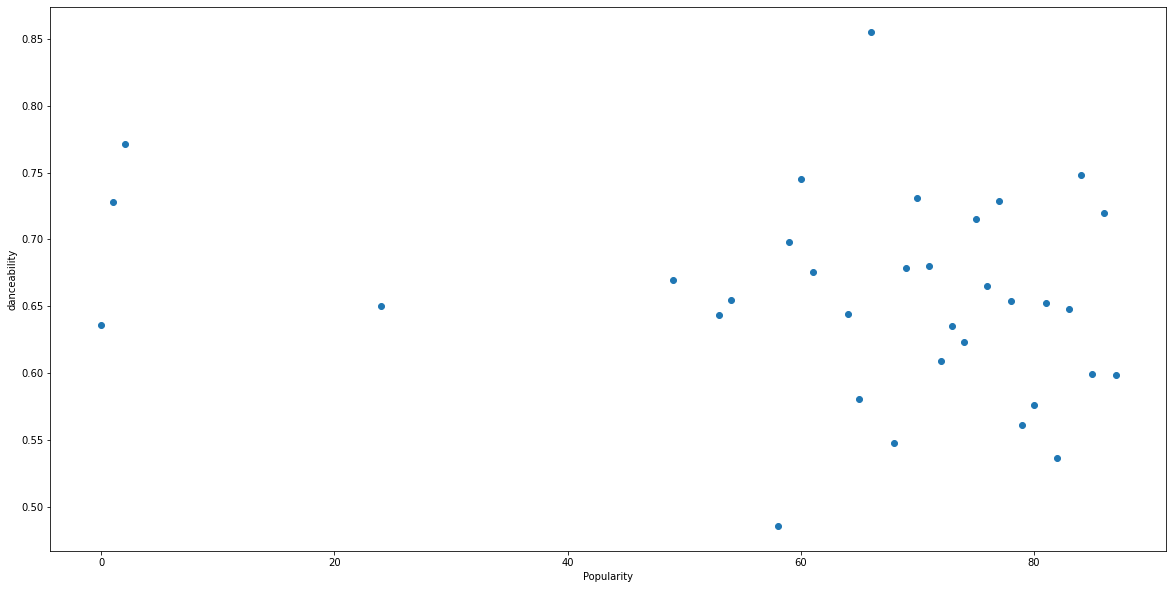

In [27]:
x = df_1.popularity
y= df_1.danceability
plt.figure(figsize=(20,10))
plt.xlabel('Popularity')
plt.ylabel('danceability')
plt.scatter(x,y)
# 'popularity' and 'danceability' are positively correlated, which implies that, 
# as the popularity of the song increase, the danceability score for that song also increases.

plt.title("Duration of songs across genres")
sns.color_palette("husl",15)
x = df.time_signature
y= df.energy
plt.scatter(x,y)
plt.xlabel("Duration (in ms)")
plt.ylabel("energy")

## Artists with Most Songs


artist_list = df.artist.value_counts()[:7]
df_artists = df[df.artist.isin(artist_list)][['artist','year',
                                                        'energy']].groupby(['artist','year']).count().reset_index()
df_artists.rename(columns={'energy':'song_count'}, inplace=True)
df_artists.head()


In [28]:
import plotly.graph_objects as go    #importing the library

matrix=df.corr()  #returns a matrix with correlation of all features
x_list=['popularity','duration_ms','explicit',
        'danceability','energy','key','loudness',
        'speechiness','acousticness','instrumentalness',
        'liveness','tempo','time_signature']

fig_heatmap = go.Figure(data=go.Heatmap(
                   z=matrix,
                   x=x_list,
                   y=x_list,
                   hoverongaps = False))
fig_heatmap.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    width = 800, height = 650,
    autosize = False )

fig_heatmap.show()

year = df['release_date'].apply(lambda x : x.year)
month = df['release_date'].apply(lambda x : x.month)
df.insert(loc=8, column='year', value=year) 
df.insert(loc=9, column='month', value=month)

## Popular Artist of 2017

df.info()

<BarContainer object of 10 artists>

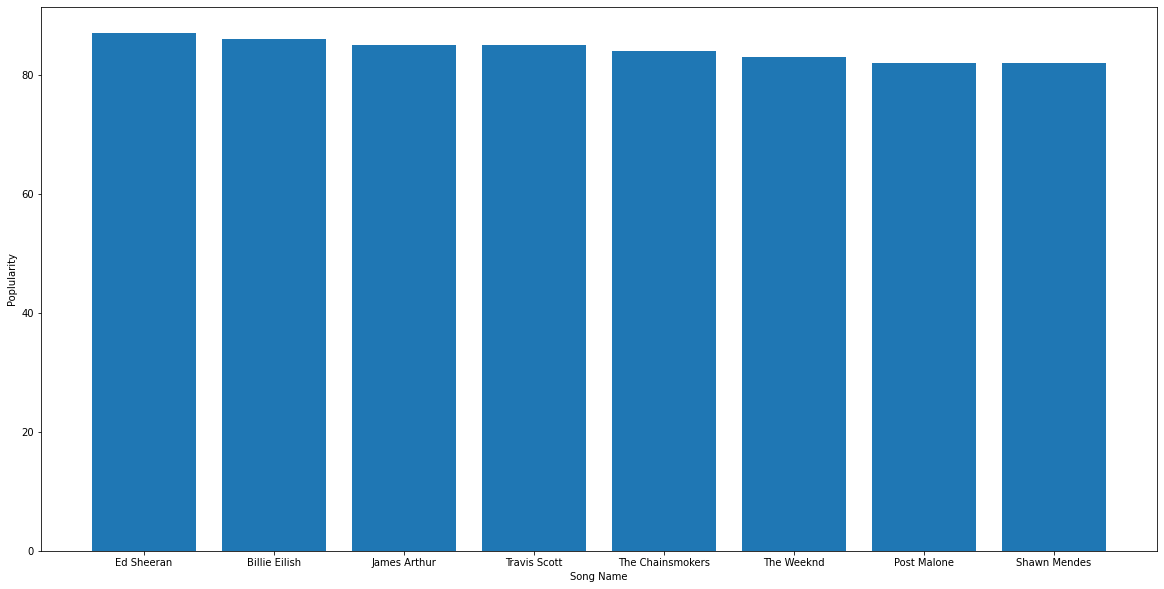

In [29]:
artists_popular = df.sort_values(by=['popularity'], ascending=False).reset_index()
artists_popular_top10 =artists_popular[:10]
x = artists_popular_top10.artist
y= artists_popular_top10.popularity
plt.figure(figsize=(20,10))
plt.xlabel('Song Name')
plt.ylabel('Poplularity')
plt.bar(x, y)



## Popular Artist 2018

<BarContainer object of 10 artists>

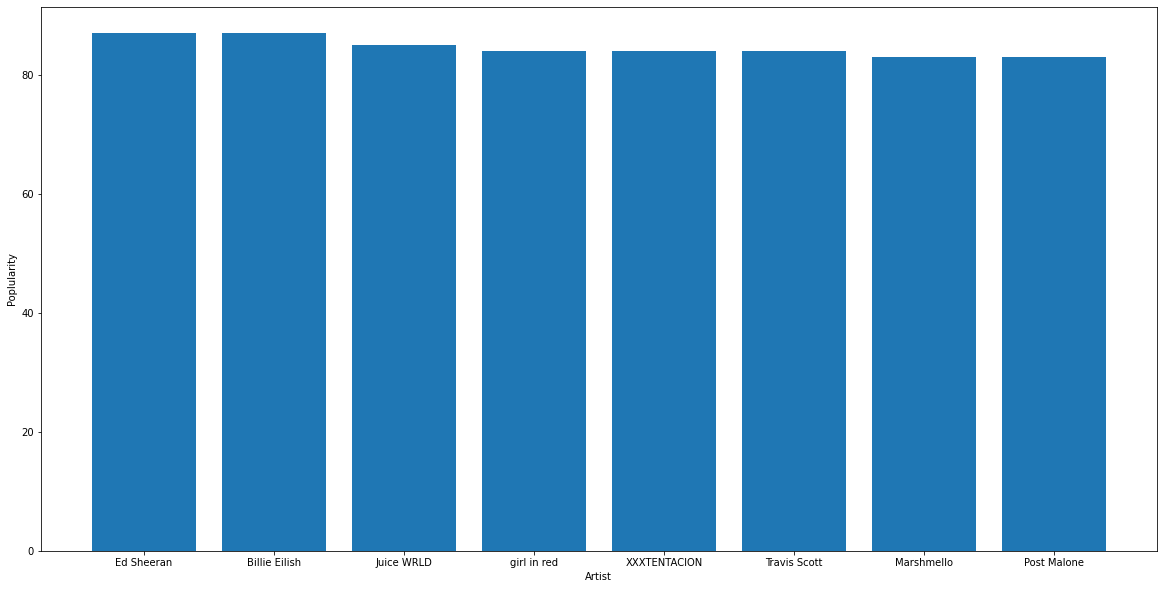

In [30]:
artists_popular18 = df2.sort_values(by=['popularity'], ascending=False).reset_index()
artists_popular_top1018 =artists_popular18[:10]
x = artists_popular_top1018.artist
y= artists_popular_top1018.popularity
plt.figure(figsize=(20,10))
plt.xlabel('Artist')
plt.ylabel('Poplularity')
plt.bar(x, y)

## Top 10 Based On tempo 2017

<BarContainer object of 10 artists>

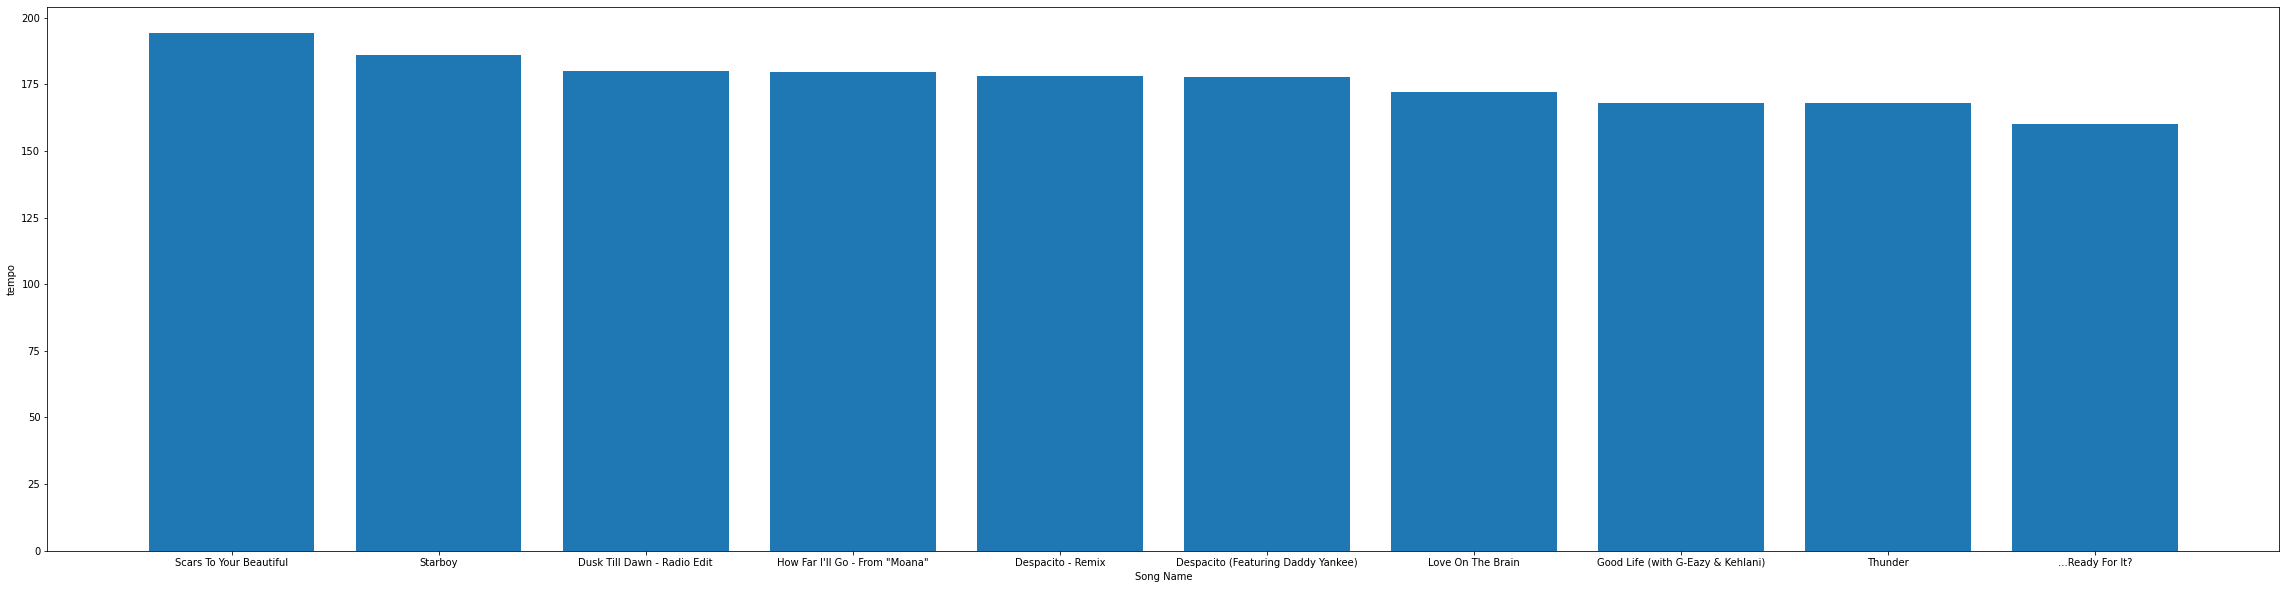

In [31]:
artists_tempo = df.sort_values(['tempo'], ascending=False).reset_index()
artists_tempo_top10 =artists_tempo[:10]
#print(artists_tempo_top10)
x = artists_tempo_top10.name
y= artists_tempo_top10.tempo
plt.figure(figsize=(40,10))
plt.xlabel('Song Name')
plt.ylabel('tempo')
plt.bar(x, y)

## Top 10 Based on tempo 2018

<BarContainer object of 10 artists>

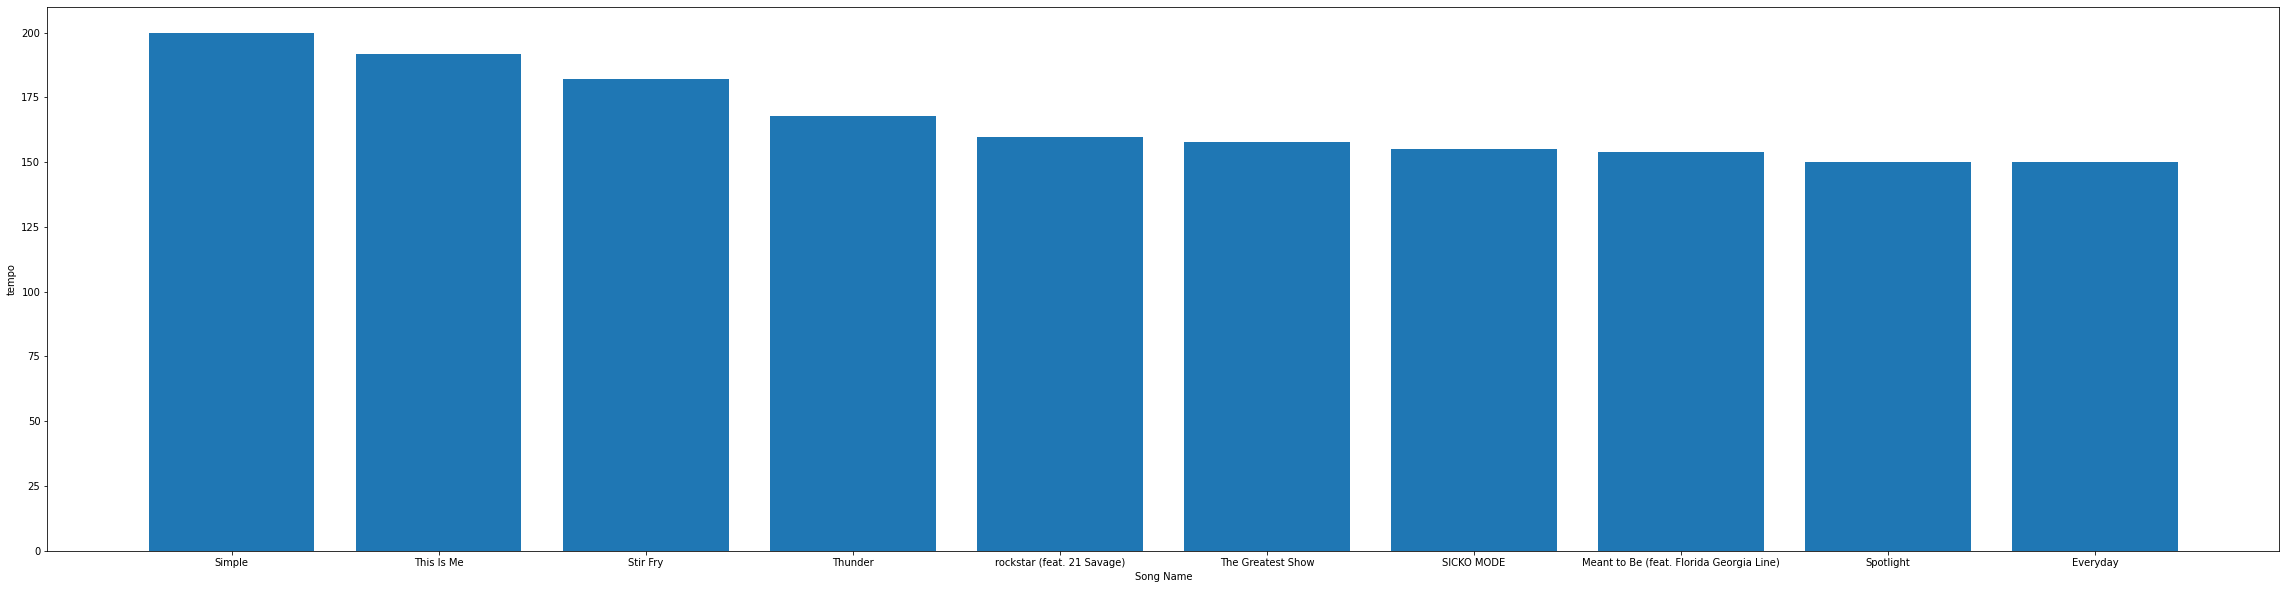

In [32]:
artists_tempo18 = df2.sort_values(['tempo'], ascending=False).reset_index()
artists_tempo_top1018 =artists_tempo18[:10]
#print(artists_tempo_top10)
x = artists_tempo_top1018.name
y= artists_tempo_top1018.tempo
plt.figure(figsize=(40,10))
plt.xlabel('Song Name')
plt.ylabel('tempo')
plt.bar(x, y)

In [33]:
artists_tempo_top10

,index,name,album,artist,release_date,year,month,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,9,Scars To Your Beautiful,Know-It-All (Deluxe),Alessia Cara,2016-03-11,2016,3,230226,79,0.02850,0.319,0.739,0.000000,0.1110,-5.740,0.2720,194.169,4
1,7,Starboy,Starboy,The Weeknd,2016-11-25,2016,11,230453,83,0.14100,0.679,0.587,0.000006,0.1370,-7.015,0.2760,186.003,4
2,13,Dusk Till Dawn - Radio Edit,Dusk Till Dawn (Radio Edit),ZAYN,2017-09-07,2017,9,239000,80,0.10100,0.258,0.437,0.000001,0.1060,-6.593,0.0390,180.043,4
3,45,"How Far I'll Go - From ""Moana""","How Far I'll Go (From ""Moana"")",Alessia Cara,2016-10-28,2016,10,175517,0,0.15700,0.314,0.555,0.000108,0.0670,-9.601,0.3700,179.666,4
4,77,Despacito - Remix,VIDA,Luis Fonsi,2019-02-01,2019,2,230413,70,0.22600,0.649,0.798,0.000000,0.0711,-4.346,0.1780,177.899,4
5,2,Despacito (Featuring Daddy Yankee),Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-01-13,2017,1,228200,1,0.20900,0.660,0.786,0.000000,0.1120,-4.757,0.1700,177.833,4
6,94,Love On The Brain,ANTI,Rihanna,2016-01-28,2016,1,224000,0,0.07170,0.509,0.637,0.000011,0.0789,-4.830,0.0471,172.006,3
7,82,Good Life (with G-Eazy & Kehlani),Good Life (with G-Eazy & Kehlani),G-Eazy,2017-03-17,2017,3,225520,64,0.00638,0.572,0.778,0.000000,0.0563,-5.208,0.2330,168.073,4
8,8,Thunder,Evolve,Imagine Dragons,2017-06-23,2017,6,187146,1,0.00683,0.600,0.810,0.210000,0.1550,-4.749,0.0479,167.880,4
9,75,...Ready For It?,reputation,Taylor Swift,2017-11-10,2017,11,208186,73,0.05270,0.613,0.764,0.000000,0.1970,-6.509,0.1360,160.015,4


## Top 10 based on Dancebility 2017

<BarContainer object of 10 artists>

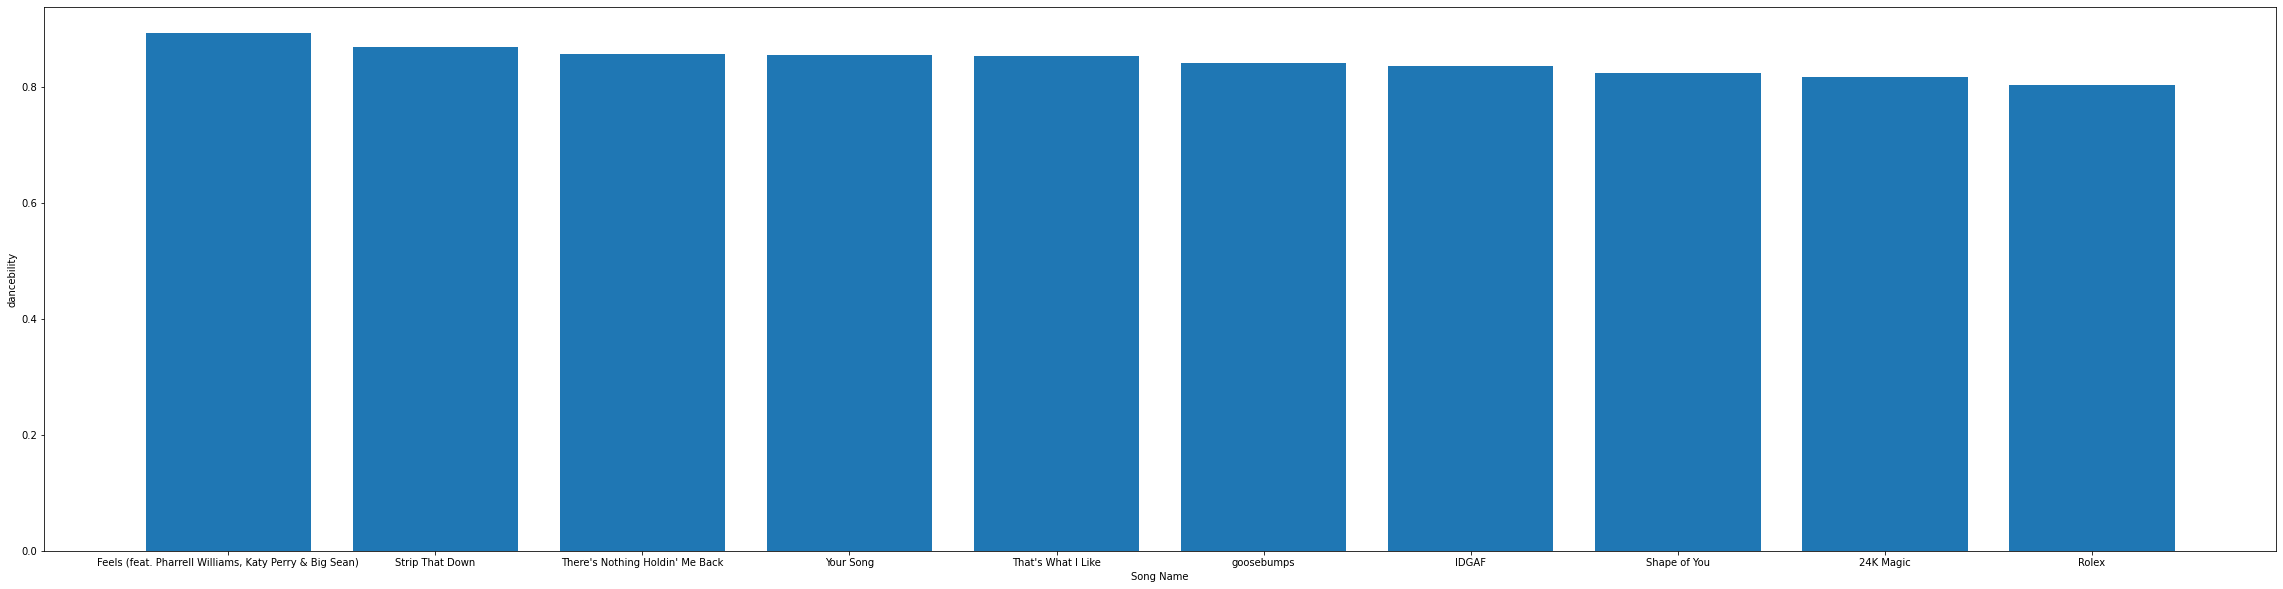

In [34]:
artists_danceability = df.sort_values(['danceability'], ascending=False).reset_index()
artists_dance_top10 = artists_danceability[:10]
#print(artists_tempo_top10)
x = artists_dance_top10.name
y= artists_dance_top10.danceability
plt.figure(figsize=(40,10))
plt.xlabel('Song Name')
plt.ylabel('dancebility')
plt.bar(x, y)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, 'Ed Sheeran'),
  Text(1, 0, 'Post Malone'),
  Text(2, 0, 'Luis Fonsi'),
  Text(3, 0, 'The Chainsmokers'),
  Text(4, 0, 'Clean Bandit'),
  Text(5, 0, 'Camila Cabello'),
  Text(6, 0, 'Drake'),
  Text(7, 0, 'The Weeknd'),
  Text(8, 0, 'Imagine Dragons'),
  Text(9, 0, 'Alessia Cara'),
  Text(10, 0, 'Zara Larsson'),
  Text(11, 0, 'Shawn Mendes'),
  Text(12, 0, 'The Vamps'),
  Text(13, 0, 'ZAYN'),
  Text(14, 0, 'Charlie Puth'),
  Text(15, 0, 'Dua Lipa'),
  Text(16, 0, 'Maggie Lindemann'),
  Text(17, 0, 'Bruno Mars'),
  Text(18, 0, 'Maroon 5'),
  Text(19, 0, 'Zedd'),
  Text(20, 0, 'James Arthur'),
  Text(21, 0, 'Jonas Blue'),
  Text(22, 0, 'Cheat Codes'),
  Text(2

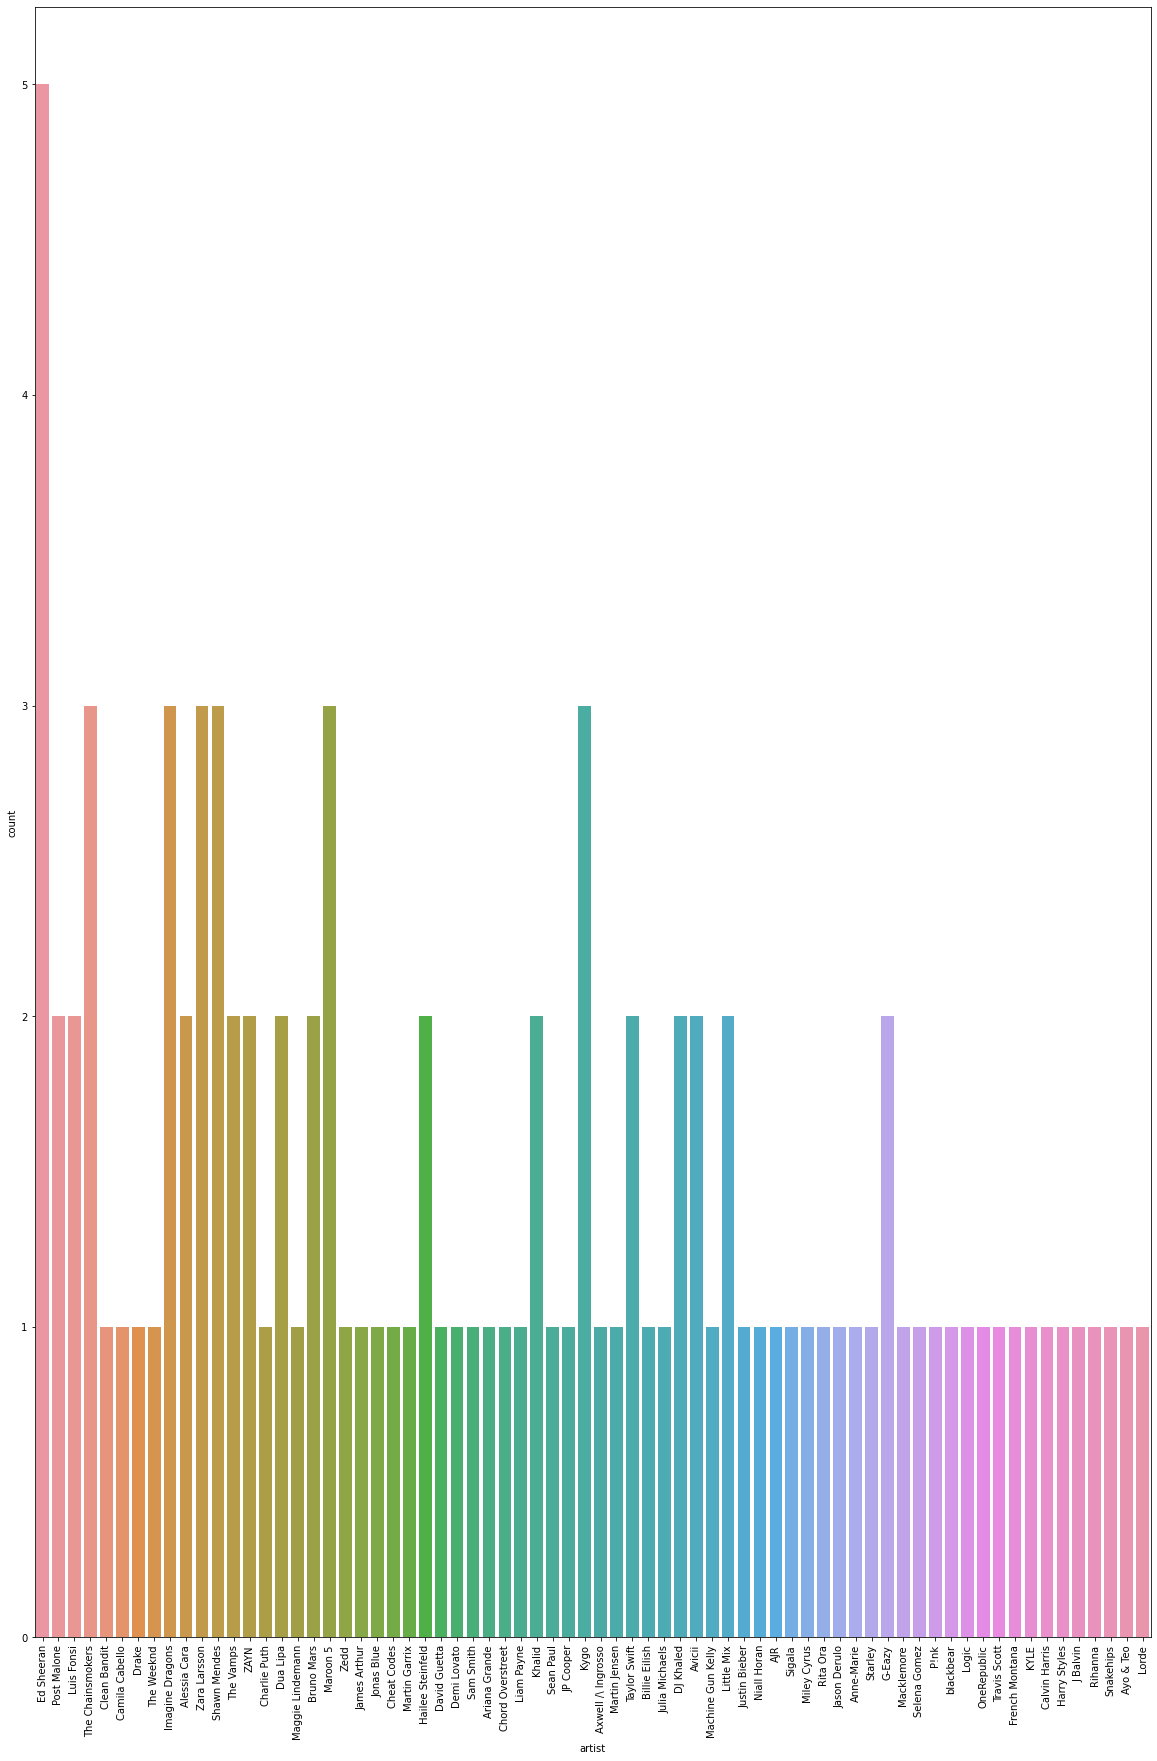

In [36]:
# The following count plot will tell which artists have most number of songs in the playlist.
plt.figure(figsize=(20,30))
sns.countplot(df['artist'])
plt.xticks(rotation=90)

In [37]:
#  top 10 artists in terms of average energy per song and compare the results with their average acousticness values.
df[['artist','energy','acousticness']].groupby('artist').mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness
artist,,
Ayo & Teo,0.8860,0.0837
Anne-Marie,0.8820,0.1270
Sean Paul,0.8820,0.0466
OneRepublic,0.8720,0.1670
Sigala,0.8680,0.0313
Maggie Lindemann,0.8680,0.1500
Starley,0.8380,0.0604
Martin Jensen,0.8360,0.0435
Little Mix,0.8195,0.0990


In [38]:
most_popular.groupby(['artist']).sum().plot(kind='pie', y='popularity',
figsize=(15,10))

NameError: name 'most_popular' is not defined

In [ ]:
top5_by_year = df.sort_values(by=['popularity'], ascending=False).groupby(['year'],sort=True).head(5).reset_index()
top5_by_year.sort_values(['year'])

,index,name,album,artist,release_date,length,popularity,acousticness,danceability,year,month,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
4,75,goosebumps,Birds In The Trap Sing McKnight,Travis Scott,2016-09-16,243836,85,0.08470,0.841,2016,9,0.728,0.000000,0.1490,-3.370,0.0484,130.049,4
5,42,Say You Won't Let Go,Back from the Edge,James Arthur,2016-10-28,211466,84,0.69500,0.358,2016,10,0.557,0.000000,0.0902,-7.398,0.0590,85.043,4
6,3,Closer,Closer,The Chainsmokers,2016-07-29,244960,84,0.41400,0.748,2016,7,0.524,0.000000,0.1110,-5.599,0.0338,95.010,4
7,7,Starboy,Starboy,The Weeknd,2016-11-25,230453,83,0.14100,0.679,2016,11,0.587,0.000006,0.1370,-7.015,0.2760,186.003,4
9,92,Congratulations,Stoney (Deluxe),Post Malone,2016-12-09,220293,81,0.21500,0.630,2016,12,0.804,0.000000,0.2530,-4.183,0.0363,123.146,4
0,45,Perfect,÷ (Deluxe),Ed Sheeran,2017-03-03,263400,87,0.16300,0.599,2017,3,0.448,0.000000,0.1060,-6.312,0.0232,95.050,3
1,0,Shape of You,÷ (Deluxe),Ed Sheeran,2017-03-03,233712,85,0.58100,0.825,2017,3,0.652,0.000000,0.0931,-3.183,0.0802,95.977,4
2,58,Jocelyn Flores,17,XXXTENTACION,2017-08-25,119133,85,0.46900,0.872,2017,8,0.391,0.000004,0.2970,-9.144,0.2420,134.021,4
3,18,Bored,Bored,Billie Eilish,2017-03-30,180933,85,0.89600,0.614,2017,3,0.318,0.002390,0.0795,-12.695,0.0478,119.959,4
8,69,XO Tour Llif3,Luv Is Rage 2,Lil Uzi Vert,2017-08-25,182706,83,0.00264,0.732,2017,8,0.750,0.000000,0.1090,-6.366,0.2310,155.096,4


year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

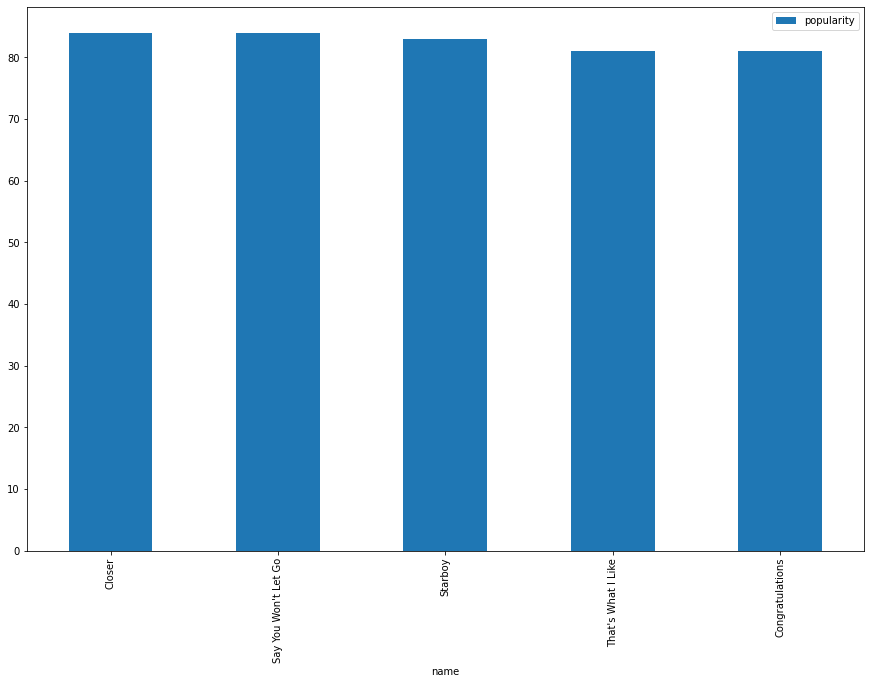

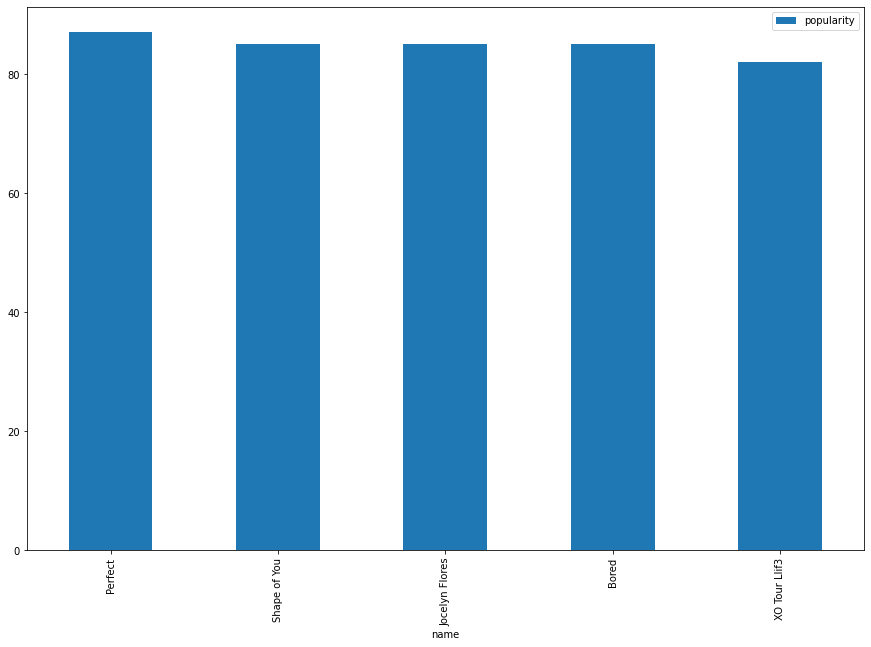

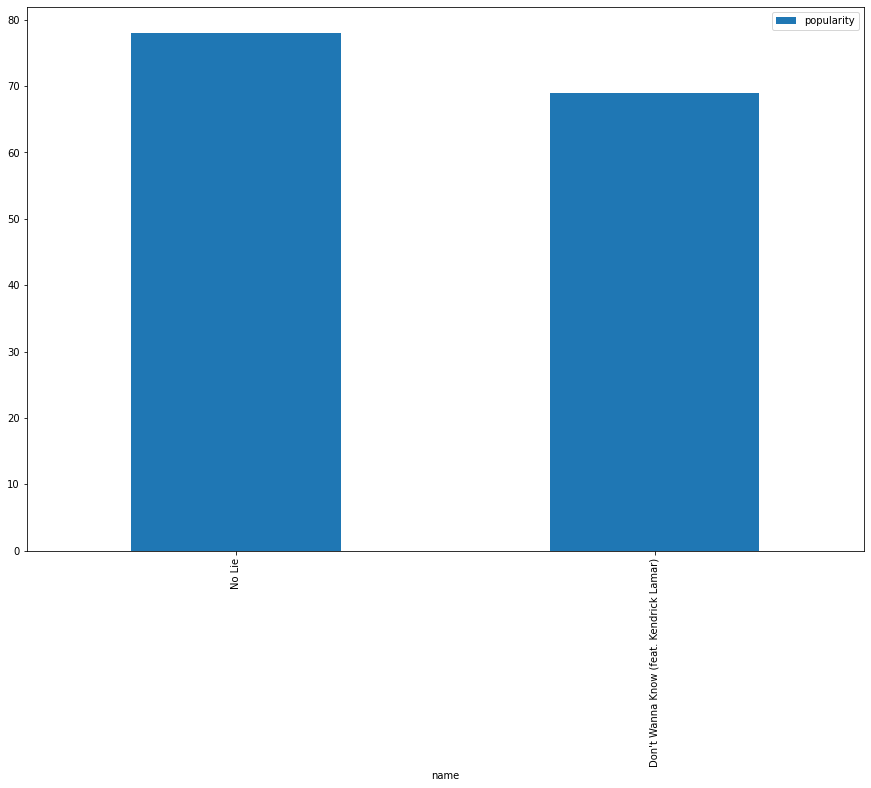

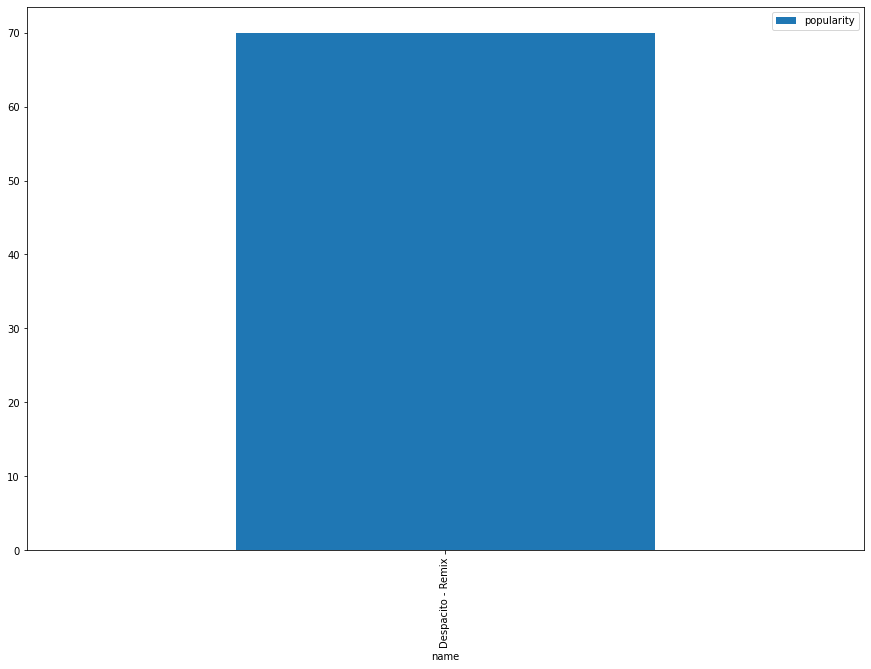

In [ ]:
top5_by_year.groupby(['year']).plot(kind='bar', y='popularity',x='name',
figsize=(15,10))